In [6]:
import pandas as pd

df = pd.read_csv("/content/sample_data/E-commerce-data.csv")

In [19]:
df.head()
df.count()

Period       2016
Payment      2016
Channel      2016
Dest Zone    2016
Remarks      2016
Count        2016
State        2016
Country      2016
dtype: int64

In [10]:
df['Remarks'].unique()

array(['Verified Orders', 'Pre-Manifest', 'M2S', 'Post-Ship'],
      dtype=object)

In [12]:
effective_df = df[df['Remarks'] != 'Verified Orders']

In [13]:
effective_df.head()

,Period,Payment,Channel,Dest Zone,Remarks,Count,State,Country
504,Feb W1,COD,APP,TIER 2,Pre-Manifest,3179,KARNATAKA,India
505,Feb W1,COD,APP,TIER 2,Pre-Manifest,2912,KERALA,India
506,Feb W1,COD,APP,TIER 2,Pre-Manifest,2037,MADHYA PRADESH,India
507,Feb W1,COD,APP,TIER 2,Pre-Manifest,2657,MAHARASHTRA,India
508,Feb W1,COD,APP,TIER 2,Pre-Manifest,3962,TAMIL NADU,India


In [18]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
print(count_row, count_col)

2016 8


In [20]:
count_row = effective_df.shape[0]  # Gives number of rows
count_col = effective_df.shape[1]  # Gives number of columns
print(count_row, count_col)

1512 8


In [23]:
total_count = effective_df['Count'].sum()

In [24]:
total_count

1196517

In [28]:
df2 = pd.DataFrame({'Row Labels' : ['M2S', 'Post-Ship', 'Pre-Manifest'],
                    'Sum of counts': [
                        effective_df[effective_df['Remarks'] == 'M2S']['Count'].sum(),
                        effective_df[effective_df['Remarks'] == 'Post-Ship']['Count'].sum(),
                        effective_df[effective_df['Remarks'] == 'Pre-Manifest']['Count'].sum()
                    ]})

In [29]:
df2

,Row Labels,Sum of counts
0,M2S,92421
1,Post-Ship,402776
2,Pre-Manifest,701320


In [30]:
df2['Percentages'] = 100 * df2['Sum of counts'] / total_count

In [31]:
df2

,Row Labels,Sum of counts,Percentages
0,M2S,92421,7.724169
1,Post-Ship,402776,33.662372
2,Pre-Manifest,701320,58.613459


<Axes: ylabel='Count'>

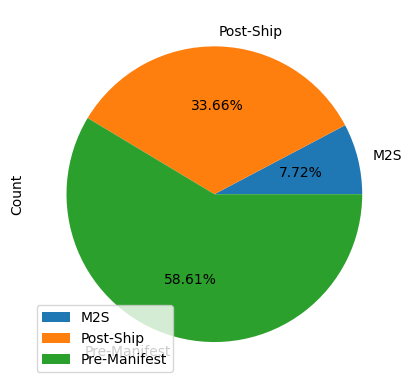

In [38]:
# Plotting the pie chart for above dataframe
effective_df.groupby(['Remarks']).sum().plot(kind='pie', y='Count', autopct='%1.2f%%')

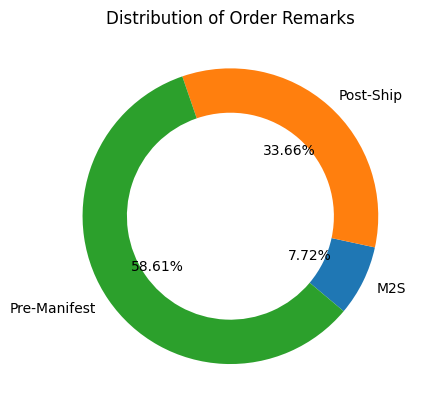

In [59]:
# prompt: Prepare a pie chart for df2

import matplotlib.pyplot as plt

# Prepare data
labels = df2['Row Labels']
sizes = df2['Percentages']

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=-40, wedgeprops=dict(width=0.3))

# Add title and show plot
plt.title("Distribution of Order Remarks")
plt.show()


In [54]:
df3 = effective_df.groupby('Remarks').agg({'Count': ['sum']})


In [57]:
df3['Percentage'] = 100 * df3['Count']['sum'] / total_count

In [58]:
df3

,Count,Percentage
,sum,
Remarks,,
M2S,92421,7.724169
Post-Ship,402776,33.662372
Pre-Manifest,701320,58.613459


In [117]:
df4 = effective_df.groupby(['Period', 'Remarks']).agg({'Count': ['sum']})

In [118]:
df4

Count
                        sum
Period Remarks             
Apr W1 M2S             5189
       Post-Ship      19658
       Pre-Manifest   15977
Apr W2 M2S             5205
       Post-Ship      15381
       Pre-Manifest   33776
Feb W1 M2S             6418
       Post-Ship      25911
       Pre-Manifest   34185
Feb W2 M2S             6270
       Post-Ship      23025
       Pre-Manifest   28171
Feb W3 M2S             5775
       Post-Ship      20733
       Pre-Manifest   24699
Feb W4 M2S             6728
       Post-Ship      21896
       Pre-Manifest   28411
Jan W1 M2S             8809
       Post-Ship      53645
       Pre-Manifest  118531
Jan W2 M2S             9315
       Post-Ship      56986
       Pre-Manifest  124964
Jan W3 M2S             9008
       Post-Ship      48444
       Pre-Manifest  106612
Jan W4 M2S            10026
       Post-Ship      49972
       Pre-Manifest  103599
Mar W1 M2S             4470
       Post-Ship      14790
       Pre-Manifest   21163
Mar W2 M2S             4982
       Post-Ship      11373
       Pre-Manifest   21512
Mar W3 M2S             3696
       Post-Ship      14858
       Pre-Manifest   18964
Mar W4 M2S             6530
       Post-Ship      26104
       Pre-Manifest   20756

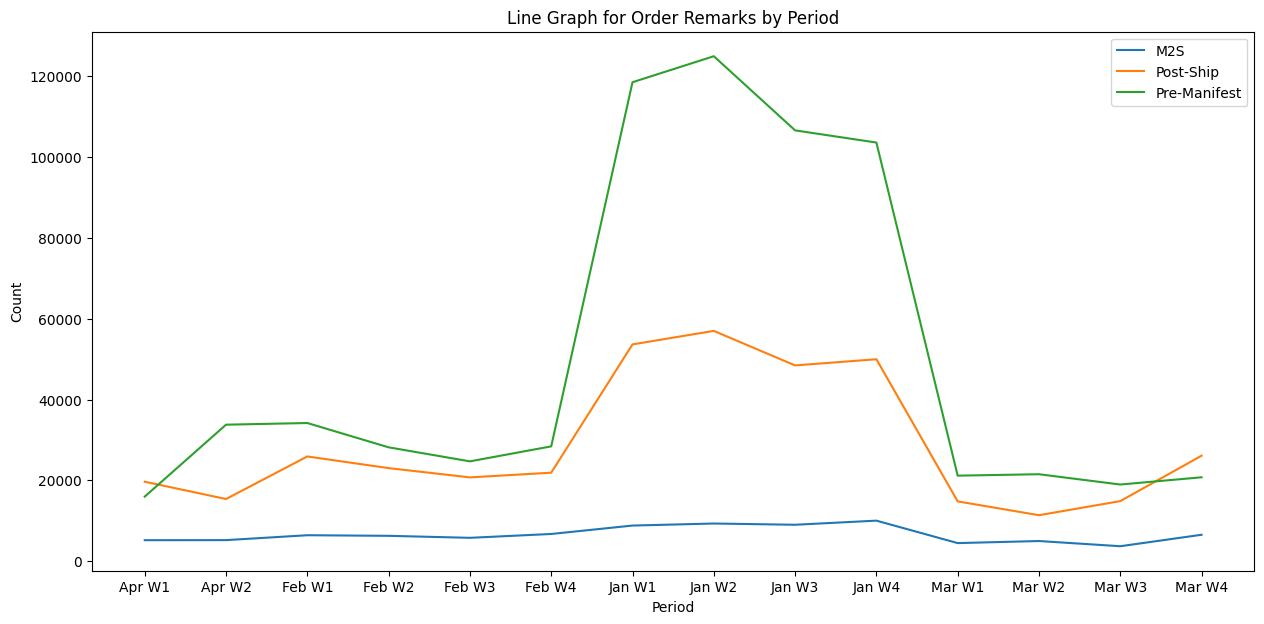

In [119]:
import matplotlib.pyplot as plt

df4.reset_index(inplace=True)

plt.figure(figsize=(15, 7))

for name, group in df4.groupby('Remarks'):
    plt.plot(group['Period'], group['Count']['sum'], label=name)

plt.title('Line Graph for Order Remarks by Period')
plt.xlabel('Period')
plt.ylabel('Count')
plt.legend()
plt.show()

In [127]:
df5 = effective_df.groupby(['Channel', 'Remarks']).agg({'Count': ['sum']})

In [128]:
df5

Count
                         sum
Channel Remarks             
APP     M2S            73446
        Post-Ship     293317
        Pre-Manifest  508629
M-Site  M2S             9518
        Post-Ship      57976
        Pre-Manifest  112780
PC      M2S             9457
        Post-Ship      51483
        Pre-Manifest   79911

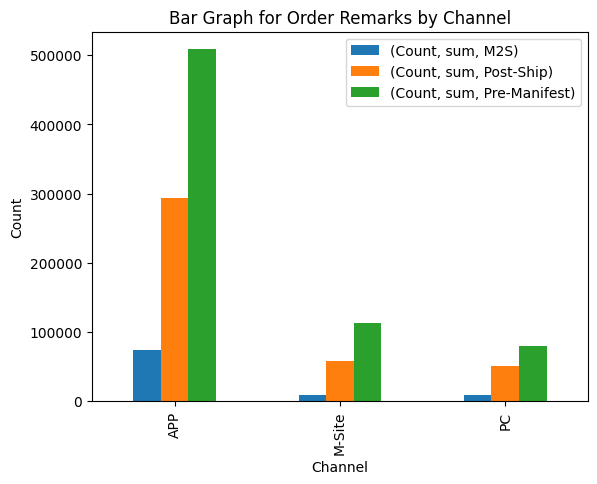

         Count                       
           sum                       
Remarks    M2S Post-Ship Pre-Manifest
Channel                              
APP      73446    293317       508629
M-Site    9518     57976       112780
PC        9457     51483        79911


In [132]:
df5.unstack().plot(kind='bar')
plt.title('Bar Graph for Order Remarks by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend()
plt.show()

print(df5.unstack())

In [133]:
df6 = effective_df.groupby(['State']).agg({'Count': ['sum']})
df6

,Count
,sum
State,
ANDHRA PRADESH,100576
ARUNACHAL PRADESH,2559
ASSAM,15558
BIHAR,38584
CHANDIGARH,27506
CHHATTISGARH,55386
DADRA & NAGAR HAVELI,17036
DAMAN & DIU,11535


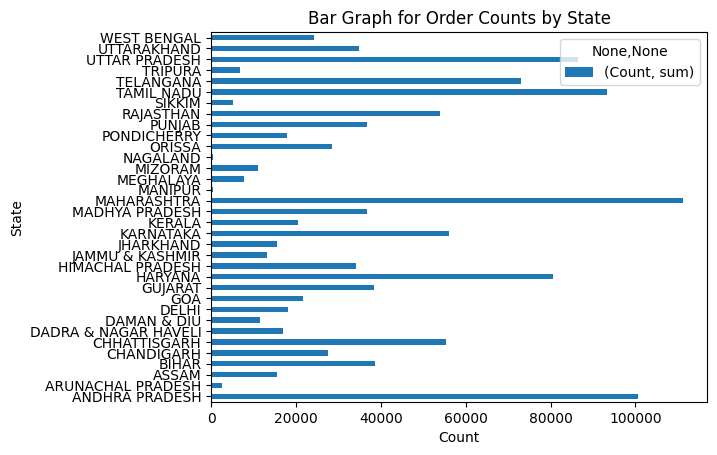

In [146]:
df6.plot(kind='barh', title="Bar Graph for Order Counts by State")
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

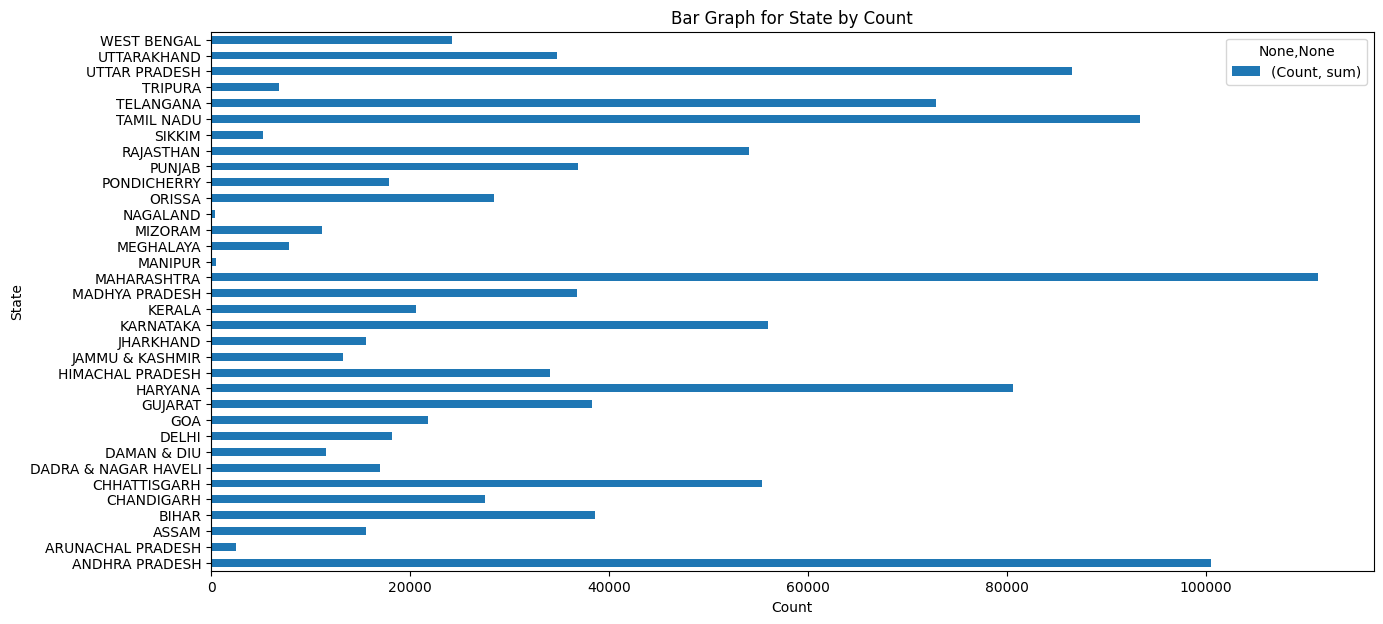

In [147]:
df6.plot(kind='barh', figsize=(15, 7))
plt.title('Bar Graph for State by Count')
plt.ylabel('State')
plt.xlabel('Count')
plt.show()

In [179]:
df7 = effective_df.groupby(['Dest Zone', 'Remarks']).agg({'Count': ['sum']})
df7 = df7.unstack()

In [180]:
df7

Count                       
             sum                       
Remarks      M2S Post-Ship Pre-Manifest
Dest Zone                              
EAST         958     35984        15793
METRO      13468     37483       120022
NE          4231     29259        16454
TIER 1     17543     67653        92579
TIER 2     30182     91474       258559
TIER 3     26039    140923       197913

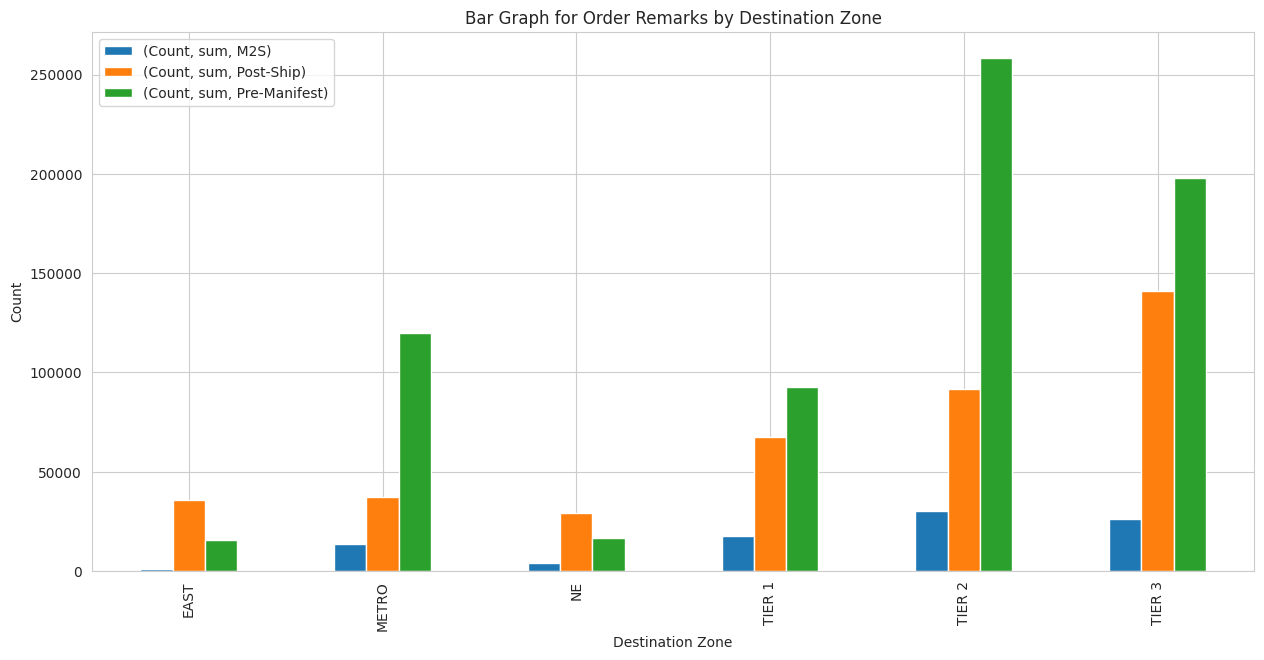

In [181]:
df7.plot(kind='bar', figsize=(15, 7))
plt.title('Bar Graph for Order Remarks by Destination Zone')
plt.xlabel('Destination Zone')
plt.ylabel('Count')
plt.legend()
plt.show()


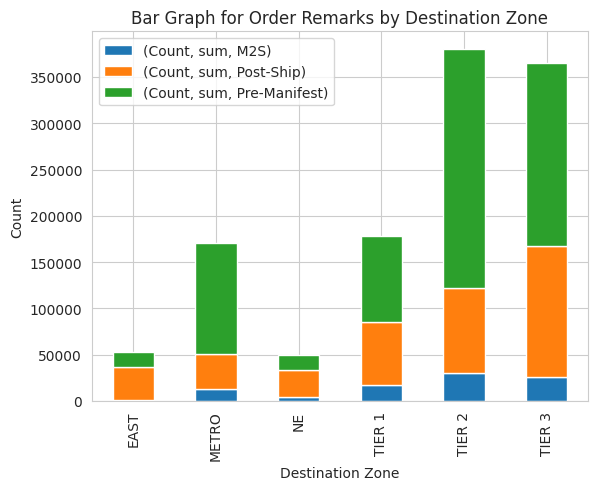

In [183]:
df7.plot(kind="bar", stacked=True)
plt.title("Bar Graph for Order Remarks by Destination Zone")
plt.xlabel("Destination Zone")
plt.ylabel("Count")
plt.legend()
plt.show()

In [189]:
df8 = df.groupby(['Payment']).agg({'Count': ['sum']})
df8['% Share'] = 100 * df8[('Count', 'sum')] / df8[('Count', 'sum')].sum()
df8

,Count,% Share
,sum,
Payment,,
COD,8235152,70.911789
STD,3378082,29.088211


<Axes: ylabel='sum'>

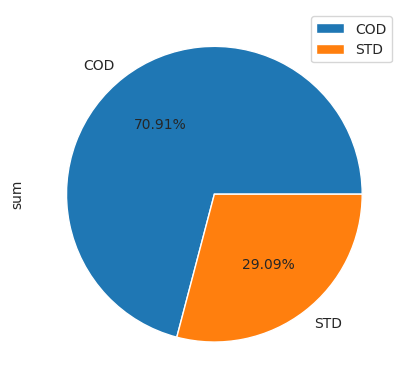

In [194]:
df8.plot(kind='pie', y='Count', autopct='%1.2f%%')

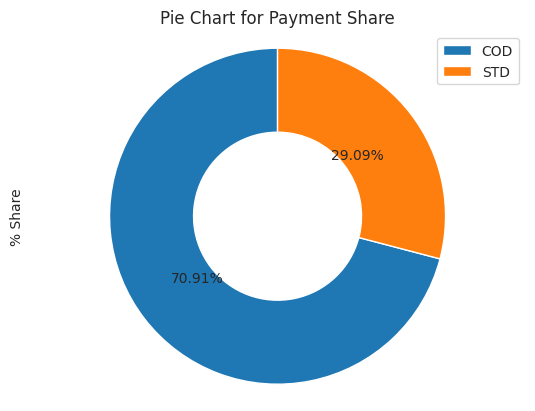

In [195]:
df8.plot(kind='pie', y='% Share', autopct="%1.2f%%", labels=None, startangle=90, wedgeprops=dict(width=0.5))
plt.title('Pie Chart for Payment Share')
plt.axis('equal')
plt.legend(labels=df8.index, loc='upper right')
plt.show()


In [203]:
df9 = effective_df.groupby(['Payment', 'Remarks']).agg({'Count': ['sum']})
df9

Count
                         sum
Payment Remarks             
COD     M2S            74695
        Post-Ship     337439
        Pre-Manifest  604601
STD     M2S            17726
        Post-Ship      65337
        Pre-Manifest   96719

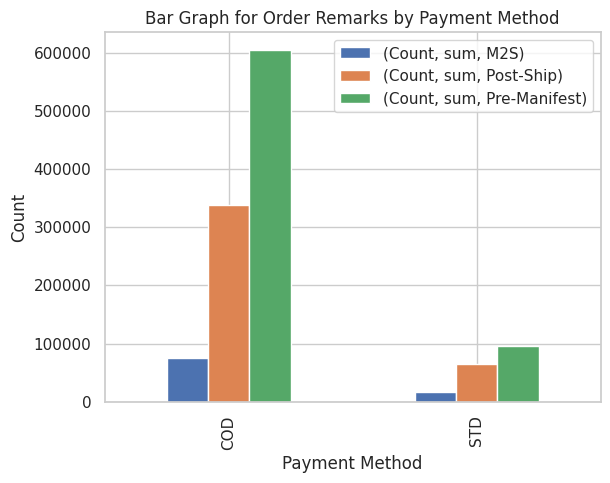

In [206]:
df9.unstack().plot(kind='bar')
plt.title('Bar Graph for Order Remarks by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend()
plt.show()